The scenario presented here is that you've recently been hired as a freelance Data Analyst for a wine boutique (BottleNeck).

You are given 3 tasks:
1. To connect an Enterprise Resource Planning (ERP) export with a Content Management System (CMS) export using the work of an intern who matched all product_id's to their corresponding Stock Keeping Units (SKU)
2. The Sales figures for online sales per product and in total
3. Verification of prices to ensure no entry errors have been made

You are provided with 3 Excel files, namely:
1. The ERP export 
2. The CSM export
3. The link file

# Step 1: IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Step 2: IMPORTING & ANALYSING DATA
## 1. The ERP export with:
    1. Product ID (within the ERP system)
    2. Availability in the web store (yes = 1 and no = 0)
    3. Product price
    4. Stock quantity
    5. Stock status

In [2]:
# Reading the ERP export
ERP = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 5\erp.xlsx")

In [3]:
ERP.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
ERP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
# Checking the number of unique product ID's in the ERP dataframe
len(ERP["product_id"].unique())

825

In [6]:
#Checking to see how many products are offered in the web store
ERP['onsale_web'].value_counts()

1    717
0    108
Name: onsale_web, dtype: int64

In [7]:
ERP.describe(include="all")

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


## 2. The CSM export with features (relevant to the current task) for:
    1. Product ID (within the CSM system [SKU])
    2. Sales quantity
    3. Product name

In [8]:
# Reading the CSM export
web_data = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 5\web.xlsx")

In [9]:
web_data.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [10]:
# Checking the data we're working with.
web_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [11]:
# Checking the number of unique product ID's in the CSM dataframe
len(web_data["sku"].unique())

715

We can note a discrepancy of 2 between the number of products available online according to the ERP and the CSM

In [12]:
# Checking for products without an ID but with an "active" tax status
web_data.loc[(web_data['sku'].isna()) & (web_data['tax_status'].notna())]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [13]:
# Creating a dataframe with only unique Product ID's
web_data_nodups = web_data.drop_duplicates(subset=['sku'], keep='first')
web_data_nodups.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [14]:
web_data_nodups.shape

(715, 28)

In [42]:
# Removing unnecessary columns from the CSM data
rel_web_data = web_data_nodups[['sku','total_sales', 'post_name']]
rel_web_data.head()

,sku,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018


## 3. The link file where the ERP product ID is matched to the CSM product ID (SKU)

In [17]:
# Reading the link file that matches id's between the 2 dataframes
link = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project 5\liaison.xlsx")

In [18]:
link.rename(columns={'id_web': 'sku'}, inplace=True)
link.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [19]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [20]:
link.isnull().sum().sum()

91

In [21]:
# Splitting the link dataframe in two

In [22]:
# Dataframe with all the product ID's without a corresponding SKU
sku_nan = link[link['sku'].isnull()]
sku_nan

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [23]:
# Dataframe with all the product ID's with a corresponding SKU
link_nonan = link.dropna()
link_nonan

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


## Task 1: merging the files

In [24]:
# merging the dataframes
link_erp = link_nonan.merge(ERP, on='product_id', how='left')
link_erp

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
729,7023,15891,1,27.5,15,instock
730,7025,15887,1,69.0,2,instock
731,7247,13127-1,1,54.8,23,instock
732,7329,14680-1,0,26.5,14,instock


In [25]:
link_erp.shape

(734, 6)

In [43]:
#using an inner merge to create a dataframe with only the products that have both a product ID and an SKU
erp_web = link_erp.merge(rel_web_data, on='sku', how='inner')
erp_web.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name
0,3847,15298,1,24.2,0,outofstock,6.0,pierre-jean-villa-saint-joseph-preface-2018
1,3849,15296,1,34.3,0,outofstock,0.0,pierre-jean-villa-saint-joseph-tilde-2017
2,3850,15300,1,20.8,0,outofstock,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032,19814,1,14.1,0,outofstock,3.0,pierre-jean-villa-igp-gamine-2018
4,4039,19815,1,46.0,0,outofstock,0.0,pierre-jean-villa-cote-rotie-carmina-2017


In [44]:
erp_web.describe()

,product_id,onsale_web,price,stock_quantity,total_sales
count,714.000000,714.0,714.000000,714.000000,714.000000
mean,5032.557423,1.0,32.493137,28.746499,4.012605
std,790.510878,0.0,27.810525,48.012608,8.518183
min,3847.000000,1.0,5.200000,0.000000,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.000000
50%,4796.000000,1.0,23.550000,12.000000,1.000000
75%,5710.500000,1.0,42.175000,35.000000,4.000000
max,7338.000000,1.0,225.000000,578.000000,96.000000


## Having a look at the products with no online ID

In [45]:
residual_prod = sku_nan.merge(ERP, on='product_id', how='left')
residual_prod

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,4055,NaN,0,86.1,0,outofstock
1,4090,NaN,0,73.0,0,outofstock
2,4092,NaN,0,47.0,0,outofstock
3,4195,NaN,0,14.1,0,outofstock
4,4209,NaN,0,73.5,0,outofstock
...,...,...,...,...,...,...
86,7196,NaN,0,31.0,55,instock
87,7200,NaN,0,31.0,6,instock
88,7201,NaN,0,31.0,18,instock
89,7203,NaN,0,45.0,30,instock


In [46]:
# Checking to see if there are products without an online ID that are available online
residual_prod["onsale_web"].unique()

array([0, 1], dtype=int64)

In [30]:
# Identifying those products
residual_prod.loc[residual_prod["onsale_web"] == 1]

,product_id,sku,onsale_web,price,stock_quantity,stock_status
11,4594,NaN,1,144.0,0,outofstock
28,5070,NaN,1,84.7,0,outofstock
29,5075,NaN,1,43.3,0,outofstock


## Task 2: Having a look at the sales figures

In [31]:
# Calculating Sales/product
erp_web['Sales'] = erp_web['price'] * erp_web['total_sales']
erp_web

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name,tax_status,Sales
0,3847,15298,1,24.2,0,outofstock,6.0,pierre-jean-villa-saint-joseph-preface-2018,taxable,145.2
1,3849,15296,1,34.3,0,outofstock,0.0,pierre-jean-villa-saint-joseph-tilde-2017,taxable,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,taxable,0.0
3,4032,19814,1,14.1,0,outofstock,3.0,pierre-jean-villa-igp-gamine-2018,taxable,42.3
4,4039,19815,1,46.0,0,outofstock,0.0,pierre-jean-villa-cote-rotie-carmina-2017,taxable,0.0
...,...,...,...,...,...,...,...,...,...,...
709,6930,16135,1,8.4,83,instock,5.0,mouthes-le-bihan-aime-chai-2015,taxable,42.0
710,7023,15891,1,27.5,15,instock,0.0,camin-larredya-jurancon-sec-la-virada-2018,taxable,0.0
711,7025,15887,1,69.0,2,instock,0.0,jamet-cote-rotie-fructus-voluptas-2018,taxable,0.0
712,7247,13127-1,1,54.8,23,instock,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,taxable,0.0


In [32]:
# Calculating  Total Sales(online)
Total_sales = erp_web['Sales'].sum()
print(Total_sales, "€ total online sales")

70568.6 € total online sales


## Task 3: Checking prices for potential input errors

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa5ccebe80>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa5ecfe520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa5cceba30>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa5ecfec70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa5ed06040>],
 'means': []}

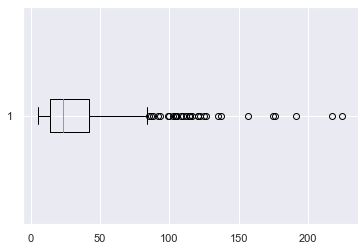

In [33]:
# Visual Price check
plt.boxplot(erp_web['price'], vert=False)

In [34]:
# Identifying the prices that are outliers and could be suspect 
# Sort the dataframe by price
sorted_price = erp_web.sort_values(by=['price'])
# identify the prices at the 25% and 75%
q1, q3 = np.percentile(sorted_price["price"],[25,75])
# calculate the Interquartile range
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(q3))
print("IQR => " + str(iqr))

# Define the upper bound by adding 1.5 x the Interquartile range to the 75% price
upper_bound = q3 + (1.5 * iqr)
print("Upper_bound => " + str(upper_bound))

# Find the prices that are above the upper bound
result = sorted_price[(sorted_price["price"] > upper_bound)]
print("Outliers => " + str(len(result)))
result['price']

Q1 => 14.1
Q3 => 42.175000000000004
IQR => 28.075000000000003
Upper_bound => 84.28750000000001
Outliers => 32


205     85.6
438     86.8
65      88.4
502     92.0
602     93.0
655     99.0
63     100.0
380    102.3
222    104.0
432    105.0
431    105.0
647    105.6
219    108.5
227    109.6
437    112.0
604    114.0
656    115.0
653    115.0
648    116.4
657    121.0
654    121.0
603    122.0
511    124.8
201    126.5
642    135.0
381    137.0
221    157.0
553    175.0
218    176.0
587    191.3
426    217.5
199    225.0
Name: price, dtype: float64

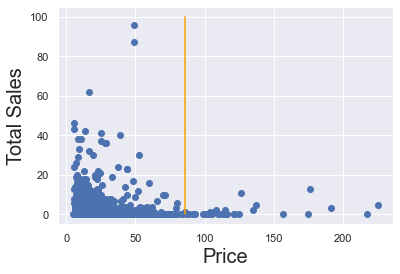

In [35]:
# Visualising the relationship between price and number of bottles sold with a line for the upper bound
x = erp_web['price']
y = erp_web['total_sales']
plt.scatter(x,y)
plt.ylabel('Total Sales',fontsize=20)
plt.xlabel('Price',fontsize=20)
plt.plot([85.6, 85.6], [0, 100], c='orange')
plt.show()

In [36]:
# Doing the same analysis for products that have actually sold
erp_web_nonull_sales= erp_web[erp_web['total_sales'] != 0]
erp_web_nonull_sales

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name,tax_status,Sales
0,3847,15298,1,24.2,0,outofstock,6.0,pierre-jean-villa-saint-joseph-preface-2018,taxable,145.2
3,4032,19814,1,14.1,0,outofstock,3.0,pierre-jean-villa-igp-gamine-2018,taxable,42.3
7,4042,16042,1,31.2,34,instock,7.0,pierre-gaillard-cornas-2017,taxable,218.4
8,4043,14980,1,60.0,12,instock,3.0,pierre-gaillard-cote-rotie-esprit-blond-2017,taxable,180.0
9,4045,16041,1,42.6,66,instock,14.0,pierre-gaillard-cote-rotie-2018,taxable,596.4
...,...,...,...,...,...,...,...,...,...,...
698,6665,16068,1,27.7,8,instock,1.0,domaine-hauvette-igp-alpilles-jaspe-2017,taxable,27.7
700,6738,8193,1,15.4,40,instock,3.0,emile-boeckel-cremant-chardonnay-extra-brut-2016,taxable,46.2
707,6926,15845,1,49.9,24,instock,1.0,chateau-jean-faure-saint-emilion-grand-cru-2016,taxable,49.9
708,6928,15741,1,19.0,20,instock,2.0,cedre-de-jean-faure-saint-emilion-2016,taxable,38.0


In [37]:
erp_web_nonull_sales.describe()

,product_id,onsale_web,price,stock_quantity,total_sales,Sales
count,385.000000,385.0,385.000000,385.000000,385.000000,385.000000
mean,4882.867532,1.0,26.581429,37.901299,7.441558,183.295065
std,737.259827,0.0,24.934530,58.943084,10.447156,400.324073
min,3847.000000,1.0,5.700000,0.000000,1.000000,6.500000
25%,4222.000000,1.0,12.500000,3.000000,2.000000,38.600000
50%,4711.000000,1.0,19.000000,19.000000,4.000000,81.600000
75%,5519.000000,1.0,31.700000,47.000000,9.000000,164.400000
max,6930.000000,1.0,225.000000,578.000000,96.000000,4704.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1aa5fe09b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa5fe162e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa5fe097f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa5fe16a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa5fe16d90>],
 'means': []}

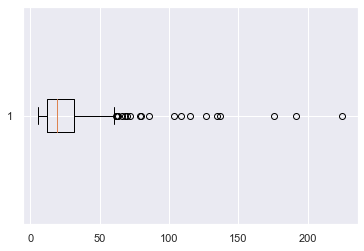

In [38]:
plt.boxplot(erp_web_nonull_sales['price'], vert=False)

In [39]:
sorted_price_nonull = erp_web_nonull_sales.sort_values(by=['price'])
q1, q3 = np.percentile(sorted_price_nonull["price"],[25,75])
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(q3))
print("IQR => " + str(iqr))
upper_bound = q3 + (1.5 * iqr)
print("Upper_bound => " + str(upper_bound))
result = sorted_price_nonull[(sorted_price_nonull["price"] > upper_bound)]
print("Outliers => " + str(len(result)))
result['price']

Q1 => 12.5
Q3 => 31.7
IQR => 19.2
Upper_bound => 60.5
Outliers => 20


229     61.6
257     62.4
217     62.5
510     63.4
491     65.9
676     68.3
182     69.8
18      71.6
200     79.5
10      80.0
205     85.6
222    104.0
219    108.5
653    115.0
201    126.5
642    135.0
381    137.0
218    176.0
587    191.3
199    225.0
Name: price, dtype: float64

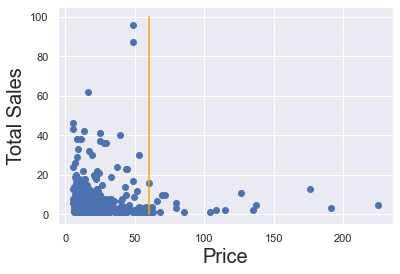

In [40]:
x = erp_web_nonull_sales['price']
y = erp_web_nonull_sales['total_sales']
plt.scatter(x,y)
plt.ylabel('Total Sales',fontsize=20)
plt.xlabel('Price',fontsize=20)
plt.plot([60.5, 60.5], [0, 100], c='orange')
plt.show()

In [41]:
# Creating a dataframe with all the products with a price above the upper bound
Outliers = erp_web.loc[erp_web['price'] >= 85.6]
Outliers.sort_values(by=['price'], ascending=False)

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name,tax_status,Sales
199,4352,15940,1,225.0,0,outofstock,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,taxable,1125.0
426,5001,14581,1,217.5,20,instock,0.0,david-duband-charmes-chambertin-grand-cru-2014,taxable,0.0
587,5892,14983,1,191.3,10,instock,3.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,taxable,573.9
218,4402,3510,1,176.0,8,instock,13.0,cognac-frapin-vip-xo,taxable,2288.0
553,5767,15185,1,175.0,12,instock,0.0,camille-giroud-clos-de-vougeot-2016,taxable,0.0
221,4406,7819,1,157.0,3,instock,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,taxable,0.0
381,4904,14220,1,137.0,13,instock,5.0,domaine-des-croix-corton-charlemagne-grand-cru...,taxable,685.0
642,6126,14923,1,135.0,10,instock,2.0,champagne-gosset-celebris-vintage-2007,taxable,270.0
201,4355,12589,1,126.5,2,instock,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,taxable,1391.5
511,5612,14915,1,124.8,12,instock,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,taxable,0.0


# Price comparison of the 3 most expensive products with other online wine retailers

### champagne-egly-ouriet-grand-cru-millesime-2008: 356€ 
##### source: https://www.enviedechamp.com/en/egly-ouriet-champagne/2444-grand-cru-millesime-2008.html
### david-duband-charmes-chambertin-grand-cru-2014: 199€ 
##### source: https://www.millesima.fr/david-duband-charmes-chambertin-grand-cru-2014.html?gclid=Cj0KCQjwqKuKBhCxARIsACf4XuHusp195jlE2GAoPEiHO6gwslX4HyFZB2bLynFwLzeLIdf8Ly4uqnsaArWdEALw_wcB
### coteaux-champenois-egly-ouriet-ambonnay-rouge-...: 189,95€ 
##### source: https://www.plus-de-bulles.com/fr/egly-ouriet/coteaux-ambonnay-rouge-2018.html?gclid=Cj0KCQjwqKuKBhCxARIsACf4XuHrj4XvWN_XubNgsBCRXCGlsLGe6uAbGVYt117EHChaitkEFkzsQ80aAj-aEALw_wcB

# Conclusions & Recommendations

1. It is indeed necessary to create a more cohesive system that connects the ERP to the CSM without the need for an intern to painstakingly match product ID's.

2. Almost every product was represented in duplicate in the CSM. A more unified approach to entering products into the CSM will need to be implemented to avoid further duplication in the future.

3. There are 2 products that are sold online but do not have an SKU.
   There are 3 products that have been flagged as being available online in the ERP but have no SKU.

4. Total online sales are currently 70568.60€

5. After analysis it appears that none of the high end prices are input errors